# Lab 3
Exploratory Data Analysis

### Learning objectives 
Upon successful completion of this lab, you will have demonstrated the abilities to: 
1. Describing numeric and categorical distributions
2. Estimating correlation and association
3. Working with different data types and doing type conversions
4. Working with Strings and String Processing
5. Testing mean differences in groups
6. Visualizing distributions, relationships, and groups




In [65]:
import pandas as pd
customer = pd.read_csv(r'C:\Users\Rinchen\Desktop\AIG\AIG 150\Week 03\customer_demographics.csv')
customer.dtypes

Education       object
customer_id      int64
AGE            float64
marital         object
JOB             object
dtype: object

1. Print the first five records from the customer dataframe to get an idea about the data.

In [66]:
customer.head()

,Education,customer_id,AGE,marital,JOB
0,secondary,100103,33.0,married,entrepreneur
1,tertiary,100106,35.0,married,management
2,primary,100118,57.0,married,blue-collar
3,primary,100119,60.0,married,retired
4,secondary,100121,28.0,married,blue-collar


2.Change customer_id type to category. Then print the types of all columns.

In [67]:
customer['customer_id'] = customer['customer_id'].astype('category')
customer.dtypes

Education        object
customer_id    category
AGE             float64
marital          object
JOB              object
dtype: object

3. Convert all the column names to lowercase.

In [68]:
customer.columns = customer.columns.str.lower()
customer.columns

Index(['education', 'customer_id', 'age', 'marital', 'job'], dtype='object')

4. Change the customer_id of the first two records to 1001036.

In [69]:
customer['customer_id'] = customer['customer_id'].cat.add_categories([1001036])
customer.loc[:1,'customer_id'] = 1001036
customer.head()

,education,customer_id,age,marital,job
0,secondary,1001036,33.0,married,entrepreneur
1,tertiary,1001036,35.0,married,management
2,primary,100118,57.0,married,blue-collar
3,primary,100119,60.0,married,retired
4,secondary,100121,28.0,married,blue-collar


5.Check if the first customer id matches the pattern. 
- Define a pattern that checks for exactly 6 digits in a string
- Compile the 6-digits pattern in a variable p. 
- Call the p.match() by passing the first customer id as argument. Use customer.iloc[0,1] which is the customer in the first row of the the dataframe. 
- print the return value.

In [97]:
import re

#I am importing re library for Regular Expression
first_customer_id = customer.iloc[0, 1]
pattern = re.compile(r'^\d{6}$')

print(pattern.match(str(first_customer_id)))

None


6.Check if all customer id values match the pattern. 
- Compile the 6-digits pattern in a variable p. 
- Use map() function and pass p.match as predicate function/first argument and the customer_id column as second argument. 
- Wrap the return value in a list named customer_id_m. 
- write a for loop, that will iterate through the matches list (customer_id_m), and print a message if there is no match. 

Expected output: 

customer id 1001036 in row 1 : does not match the pattern
customer id 10b1036 in row 2 : does not match the pattern

In [71]:
pattern = re.compile(r'^\d{6}$')

customer_id_list = list(map(pattern.match, customer['customer_id'].astype(str)))

for row_no, match_result in enumerate(customer_id_list, start=1):
    if match_result is None:
        print(f"customer id in row {row_no}: {customer['customer_id'].iloc[row_no - 1]} does not match the pattern")

customer id in row 1: 1001036 does not match the pattern
customer id in row 2: 1001036 does not match the pattern


7.Check and treat errors in the education column.
- Display the list of unique values for  education
- lowercase all values under the education column. use mydf[colname].str.lower(). Keep the original column 'education' and add a new column named 'education_lowercase'. 
- after lowercasing, display the list of unique values for  education_lowercase column.

In [72]:
print("Output 1: Unique values for 'Education' before treatment:")
print(customer['education'].unique())

customer['education_lowercase'] = customer['education'].str.lower()

print("\nOutput 2: Unique values for 'education_lowercase' after treatment in :")
print(customer['education_lowercase'].unique())

Output 1: Unique values for 'Education' before treatment:
['secondary' 'tertiary' 'primary' 'unknown' 'SECONDARY']

Output 2: Unique values for 'education_lowercase' after treatment in :
['secondary' 'tertiary' 'primary' 'unknown']


8.Copy values between columns and Drop columns 
- Assign the education_lower values to education. 
- drop the education_lowercase column 
- show the top rows of the dataset.

In [73]:
customer['education'] = customer['education_lowercase']

customer = customer.drop(columns=['education_lowercase'])
customer.head()

,education,customer_id,age,marital,job
0,secondary,1001036,33.0,married,entrepreneur
1,tertiary,1001036,35.0,married,management
2,primary,100118,57.0,married,blue-collar
3,primary,100119,60.0,married,retired
4,secondary,100121,28.0,married,blue-collar


9.Find and correct errors in the job column.  
- show the list of unique values under the job column. Use value_counts() method. 
- admin. and ADMINISTRATION should refer to the same category level. replace all ADMINISTRATION occurrences with 'admin.' Use the replace() method. syntax: mydataframe.columnname.replace(oldvalue, newvalue) 
- after you make the changes, show again the list of unique values under the job column. 

ref: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html?highlight=replace#pandas.DataFrame.replace

In [74]:
print("Unique values and counts before correction for column :\n",customer['job'].value_counts())
#replacing the values
customer['job'] = customer['job'].replace('ADMINISTRATION','admin.')

print("Unique values and counts after correction for column:\n",customer['job'].value_counts())

Unique values and counts before correction for column :
 job
management        2391
blue-collar       1914
technician        1768
admin.            1134
services           850
retired            757
student            375
self-employed      367
unemployed         353
entrepreneur       291
housemaid          262
unknown             65
ADMINISTRATION      51
Name: count, dtype: int64
Unique values and counts after correction for column:
 job
management       2391
blue-collar      1914
technician       1768
admin.           1185
services          850
retired           757
student           375
self-employed     367
unemployed        353
entrepreneur      291
housemaid         262
unknown            65
Name: count, dtype: int64


10. Add a new column to the dataframe by taking the first 3 letters of the marital column. 
- Note: you should lowercase all values for the marital column. 


In [75]:
customer['marital'] = customer['marital'].str.lower()
customer['marital_first3'] = customer['marital'].str[:3]

customer.head()

,education,customer_id,age,marital,job,marital_first3
0,secondary,1001036,33.0,married,entrepreneur,mar
1,tertiary,1001036,35.0,married,management,mar
2,primary,100118,57.0,married,blue-collar,mar
3,primary,100119,60.0,married,retired,mar
4,secondary,100121,28.0,married,blue-collar,mar


11.Add a dummy variable
- Add a new column marital_b to the dataframe that takes the value 0 if marital is single, 1 if marital is married and 2 if marital is divorced. 
- Hint: use the replace method on the required column and pass a dictionary of oldValue:newValue items for replacement.  


In [76]:
mapping = {'Single': 0, 'Married': 1, 'Divorced': 2}
customer['marital_b'] = customer['marital'].replace(mapping)

# Display the updated DataFrame
customer

,education,customer_id,age,marital,job,marital_first3,marital_b
0,secondary,1001036,33.0,married,entrepreneur,mar,married
1,tertiary,1001036,35.0,married,management,mar,married
2,primary,100118,57.0,married,blue-collar,mar,married
3,primary,100119,60.0,married,retired,mar,married
4,secondary,100121,28.0,married,blue-collar,mar,married
...,...,...,...,...,...,...,...
10573,secondary,145305,73.0,married,retired,mar,married
10574,secondary,145306,25.0,single,technician,sin,single
10575,tertiary,145307,51.0,married,technician,mar,married
10576,primary,145308,71.0,divorced,retired,div,divorced


12.Customized binning 
- add a new column age_group based on age. If age is <35, age_group is set to young. if age between 36 and 55, the age_group is set to 'middle'. if age is >55, age_group is set to 'senior'.

    Use conditional assignment: https://datatofish.com/if-condition-in-pandas-dataframe/

This is the general structure that you may use to create the IF condition:

    df.loc[df['column name'] condition, 'new column name'] = 'value if condition is met'

In [77]:
customer.loc[customer['age'] < 35, 'age_group'] = 'young'
customer.loc[(customer['age'] >= 35) & (customer['age'] <= 55), 'age_group'] = 'middle'
customer.loc[customer['age'] > 55, 'age_group'] = 'senior'

# Display the updated DataFrame
customer

,education,customer_id,age,marital,job,marital_first3,marital_b,age_group
0,secondary,1001036,33.0,married,entrepreneur,mar,married,young
1,tertiary,1001036,35.0,married,management,mar,married,middle
2,primary,100118,57.0,married,blue-collar,mar,married,senior
3,primary,100119,60.0,married,retired,mar,married,senior
4,secondary,100121,28.0,married,blue-collar,mar,married,young
...,...,...,...,...,...,...,...,...
10573,secondary,145305,73.0,married,retired,mar,married,senior
10574,secondary,145306,25.0,single,technician,sin,single,young
10575,tertiary,145307,51.0,married,technician,mar,married,middle
10576,primary,145308,71.0,divorced,retired,div,divorced,senior


13.Download the Boston Housing dataset from https://www.kaggle.com/datasets/arunjangir245/boston-housing-dataset
Read the csv file into a dataframe called boston.
Print the first 5 records from the boston dataframe.

In [78]:
boston = pd.read_csv(r'C:\Users\Rinchen\Desktop\AIG\AIG 150\Week 03\archive\BostonHousing.csv')
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


14.Show the quantile table for the numerical columns of boston dataset using the quantile() function. 

In [79]:
boston.quantile([0.25, 0.5, 0.75])

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0.25,0.082045,0.0,5.19,0.0,0.449,5.884,45.025,2.100175,4.0,279.0,17.40,375.3775,6.950,17.025
0.50,0.256510,0.0,9.69,0.0,0.538,6.208,77.500,3.207450,5.0,330.0,19.05,391.4400,11.360,21.200
0.75,3.677083,12.5,18.10,0.0,0.624,6.625,94.075,5.188425,24.0,666.0,20.20,396.2250,16.955,25.000


15.Show the summary statistics of boston dataset using the describe() function

In [80]:
boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


16.First run the following command
print(boston.shape) and copy the result

We will now do the equal-sized binning:

        create a new dataframe boston_binned, result of equal-sized binning of all the numerical columns in boston dataset given the percentile points in the quantile table. 
        Use a for loop to iterate over the columns in boston dataset, and call qcut for binning each of the columns. 

        Refer to: ch13: exploring data analysis, page 4(Python for Data Science for Dummies, 2nd Edition), section: counting for categorical Data.

        print the first 5 rows of boston_binned dataset using the head() function.

In [82]:
boston.shape

(506, 14)

In [83]:
quantile_points = [0, 0.25, 0.5, 0.75, 1]
boston_binned = pd.DataFrame()

for column in boston.columns:
    if pd.api.types.is_numeric_dtype(boston[column]):
        boston_binned[column] = pd.qcut(boston[column], q=quantile_points, labels=False, duplicates='drop')

boston_binned.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0,1,0,0,1,2.0,1,2,0,1,0,3,0,2
1,0,0,1,0,1,2.0,2,2,0,0,1,3,1,2
2,0,0,1,0,1,3.0,1,2,0,0,1,2,0,3
3,0,0,0,0,1,3.0,1,3,0,0,1,2,0,3
4,0,0,0,0,1,3.0,1,3,0,0,1,3,0,3


17.Show the frequency table for the variable CRIM in boston_binned. Use value_counts() function. 

In [84]:
boston_binned['crim'].value_counts()

crim
0    127
3    127
1    126
2    126
Name: count, dtype: int64

18.Study the relationship between CRIM and MEDV categorical variables in boston_binned dataframe. 

In [85]:
pd.crosstab(boston_binned['crim'], boston_binned['medv'])

medv,0,1,2,3
crim,,,,
0,2,26,42,57
1,12,44,45,25
2,29,37,27,33
3,84,22,12,9


19.calculate the chi-square and the associated p-value betweeb CRIM and MEDV in boston_binned dataframe. 

In [86]:
from scipy.stats import chi2_contingency

chi2, p, _, _ = chi2_contingency(pd.crosstab(boston_binned['crim'], boston_binned['medv']))

print(f"Chi-square value: {chi2}")
print(f"P-value: {p}")

Chi-square value: 195.96280715687166
P-value: 2.3238405860709773e-37


20.Below are the intervals for the variable MEDV in boston_binned dataframe. 
    1. define a dictionary palette of interval names as keys and colors of your choice as values. 
    2. print the dictionary

In [89]:
palette = {'0': 'blue','1': 'green','2': 'orange','3': 'red'}
palette

{'0': 'blue', '1': 'green', '2': 'orange', '3': 'red'}

21.Plotting scatterplots: 
    1. display a scatter chart with the MEDV on the y axis and DIS on the x axis. Highlight the different intervals of MEDV with different colors. 
    3. interpret the scatter plot.  
    reuse code in ch13, page 7, section: Plotting Scatterplots from Python for Data Science for Dummies, 2nd Edition. 

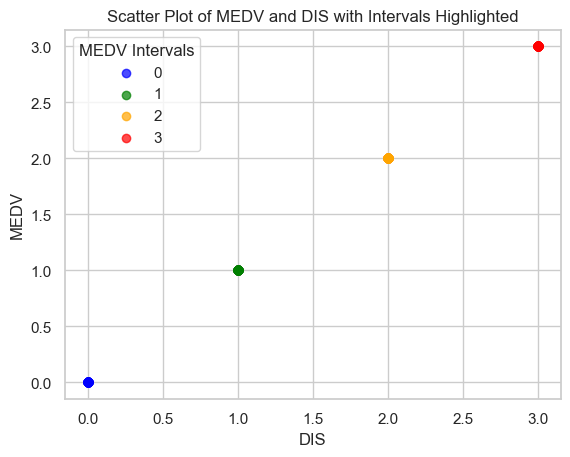

In [90]:
for interval, color in palette.items():
    subset = boston_binned[boston_binned['medv'].astype(str) == interval]
    plt.scatter(subset['medv'], subset['medv'], label=interval, color=color, alpha=0.7)

# Set plot labels and title
plt.xlabel('DIS')
plt.ylabel('MEDV')
plt.title('Scatter Plot of MEDV and DIS with Intervals Highlighted')

# Show the legend
plt.legend(title='MEDV Intervals')

# Display the plot
plt.show()

22.plotting scatterplots: 
    1. display a scatter chart with the MEDV on the y axis and DIS on the x axis. Highlight the different intervals of MEDV with different colors. 
    3. interpret the scatter plot.  
    reuse code in ch13, page 7, section: Plotting Scatterplots from Python for Data Science for Dummies, 2nd Edition. 

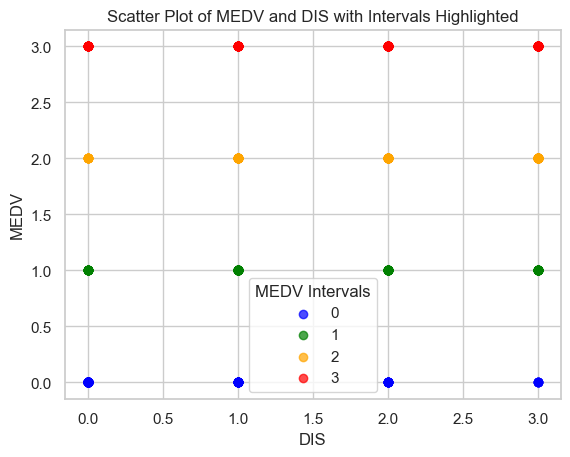

In [91]:
for interval, color in palette.items():
    subset = boston_binned[boston_binned['medv'].astype(str) == interval]
    plt.scatter(subset['dis'], subset['medv'], label=interval, color=color, alpha=0.7)

# Set plot labels and title
plt.xlabel('DIS')
plt.ylabel('MEDV')
plt.title('Scatter Plot of MEDV and DIS with Intervals Highlighted')

# Show the legend
plt.legend(title='MEDV Intervals')

# Display the plot
plt.show()

23.display a scatter matrix with only the following variables: 
CRIM, ZN, INDUS, RM and MEDV.

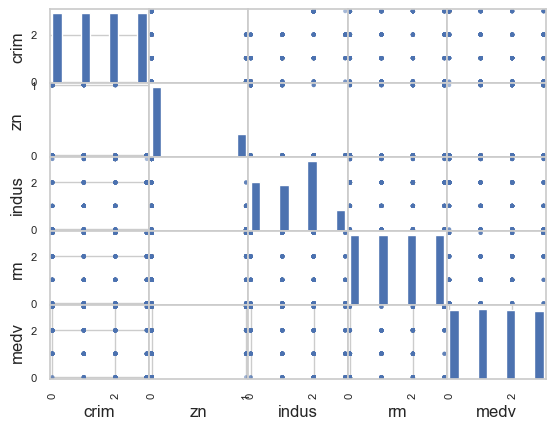

In [92]:
from pandas.plotting import scatter_matrix

selected_variables = ['crim', 'zn', 'indus', 'rm', 'medv']

subset_df = boston_binned[selected_variables]

scatter_matrix(subset_df)
plt.show()